In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy
 
#from tqdm import tqdm

In [19]:
# Load the data
#df = pd.read_csv('D:/data/benin-malanville.csv')
df = pd.read_csv('C:/Users/berhe.kalayu/Desktop/Week-0/merged_data.csv')

## Doing the Summary Statistics:  Calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand data distribution.

In [ ]:
# Select numeric columns
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number]).columns
# Calculate summary statistics
summary_statistics = df[numeric_columns].describe()
# Add median to summary statistics
summary_statistics.loc['median'] = df[numeric_columns].median()
# Add standard deviation to summary statistics
summary_statistics.loc['std'] = df[numeric_columns].std()
# Reorder rows
summary_statistics = summary_statistics.reindex(['count', 'mean', 'std', 'median', 'min', '25%', '50%', '75%', 'max'])
print(summary_statistics)

# Save summary statistics to CSV
summary_statistics.to_csv('summary_statistics.csv')
print("Summary statistics saved to 'summary_statistics.csv'")

## Doing the Data Quality Check: Look for missing values, outliers, or incorrect entries (e.g., negative values where only positive should exist), especially in columns like GHI, DNI, and DHI and check for outliers, especially in sensor readings (ModA, ModB) and wind speed data (WS, WSgust).

In [ ]:
# Check for negative values in GHI, DNI, and DHI
negative_ghi = df[df['GHI'] < 0]
negative_dni = df[df['DNI'] < 0]
negative_dhi = df[df['DHI'] < 0]

# Check for outliers in ModA, ModB, WS, and WSgust using IQR
columns_to_check = ['ModA', 'ModB', 'WS', 'WSgust']
outliers = {}
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

# Print results
print("Negative GHI values:", negative_ghi.shape[0])
print("Negative DNI values:", negative_dni.shape[0])
print("Negative DHI values:", negative_dhi.shape[0])

for column, outlier_df in outliers.items():
    print("Outliers in", column, ":", outlier_df.shape[0]) 

## Time Series Analysis: Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

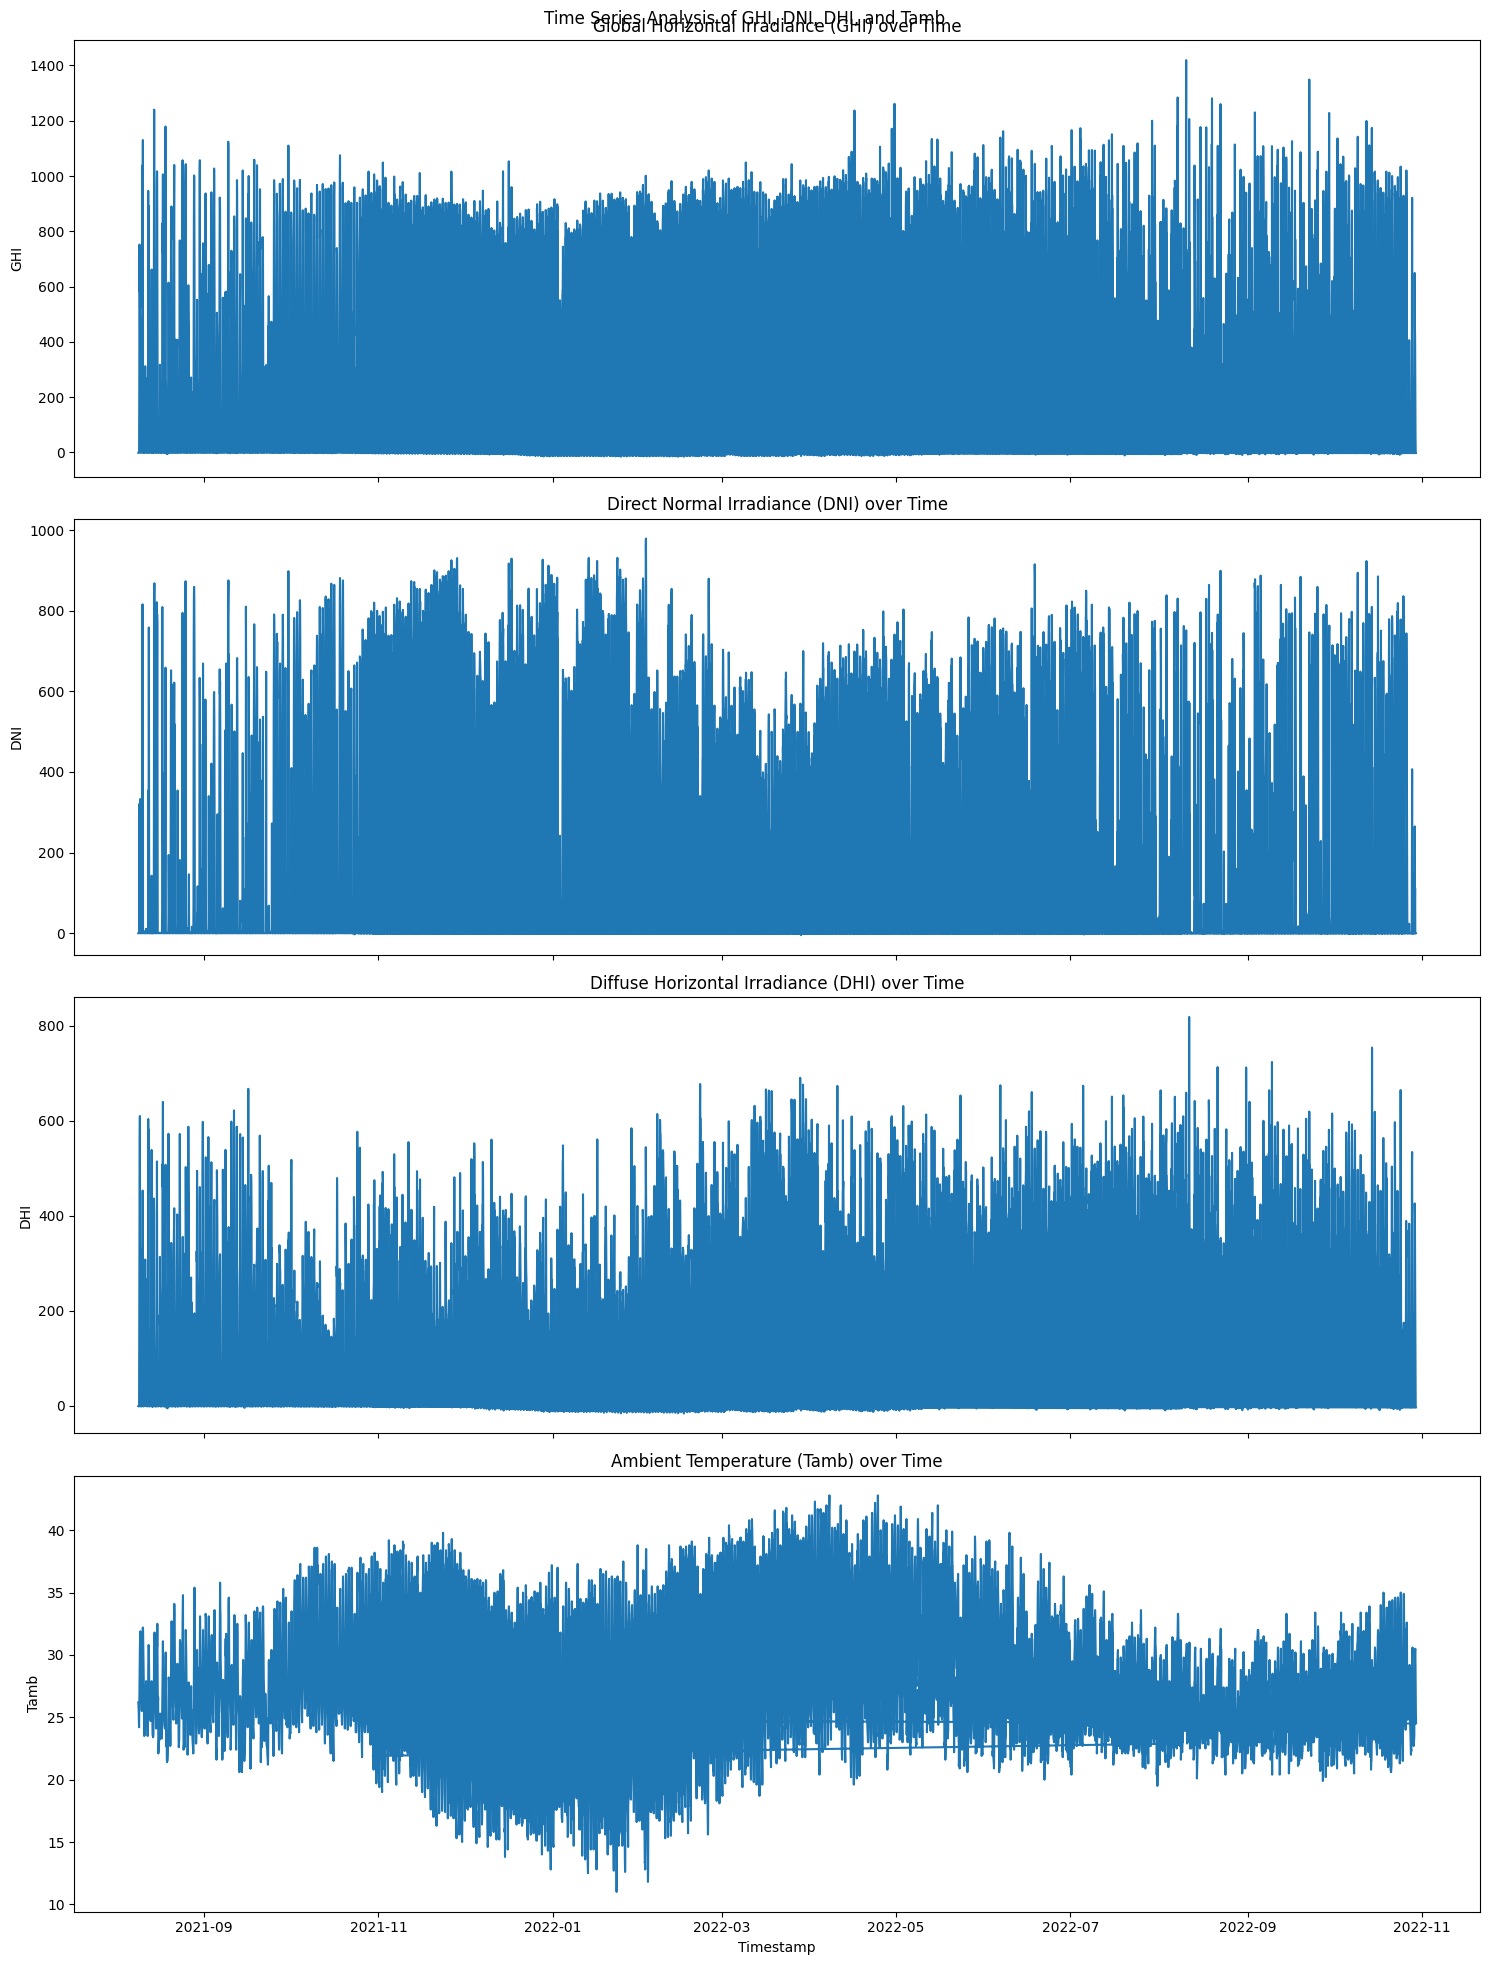

In [22]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sample the data (e.g., every 100th row) to make the plot more manageable
df_sample = df.iloc[::100].copy()

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series Analysis of GHI, DNI, DHI, and Tamb')

# Plot GHI
axs[0].plot(df_sample['Timestamp'], df_sample['GHI'])
axs[0].set_ylabel('GHI')
axs[0].set_title('Global Horizontal Irradiance (GHI) over Time')

# Plot DNI
axs[1].plot(df_sample['Timestamp'], df_sample['DNI'])
axs[1].set_ylabel('DNI')
axs[1].set_title('Direct Normal Irradiance (DNI) over Time')

# Plot DHI
axs[2].plot(df_sample['Timestamp'], df_sample['DHI'])
axs[2].set_ylabel('DHI')
axs[2].set_title('Diffuse Horizontal Irradiance (DHI) over Time')

# Plot Tamb
axs[3].plot(df_sample['Timestamp'], df_sample['Tamb'])
axs[3].set_ylabel('Tamb')
axs[3].set_title('Ambient Temperature (Tamb) over Time')

plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()

## Doing the Evaluation of the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

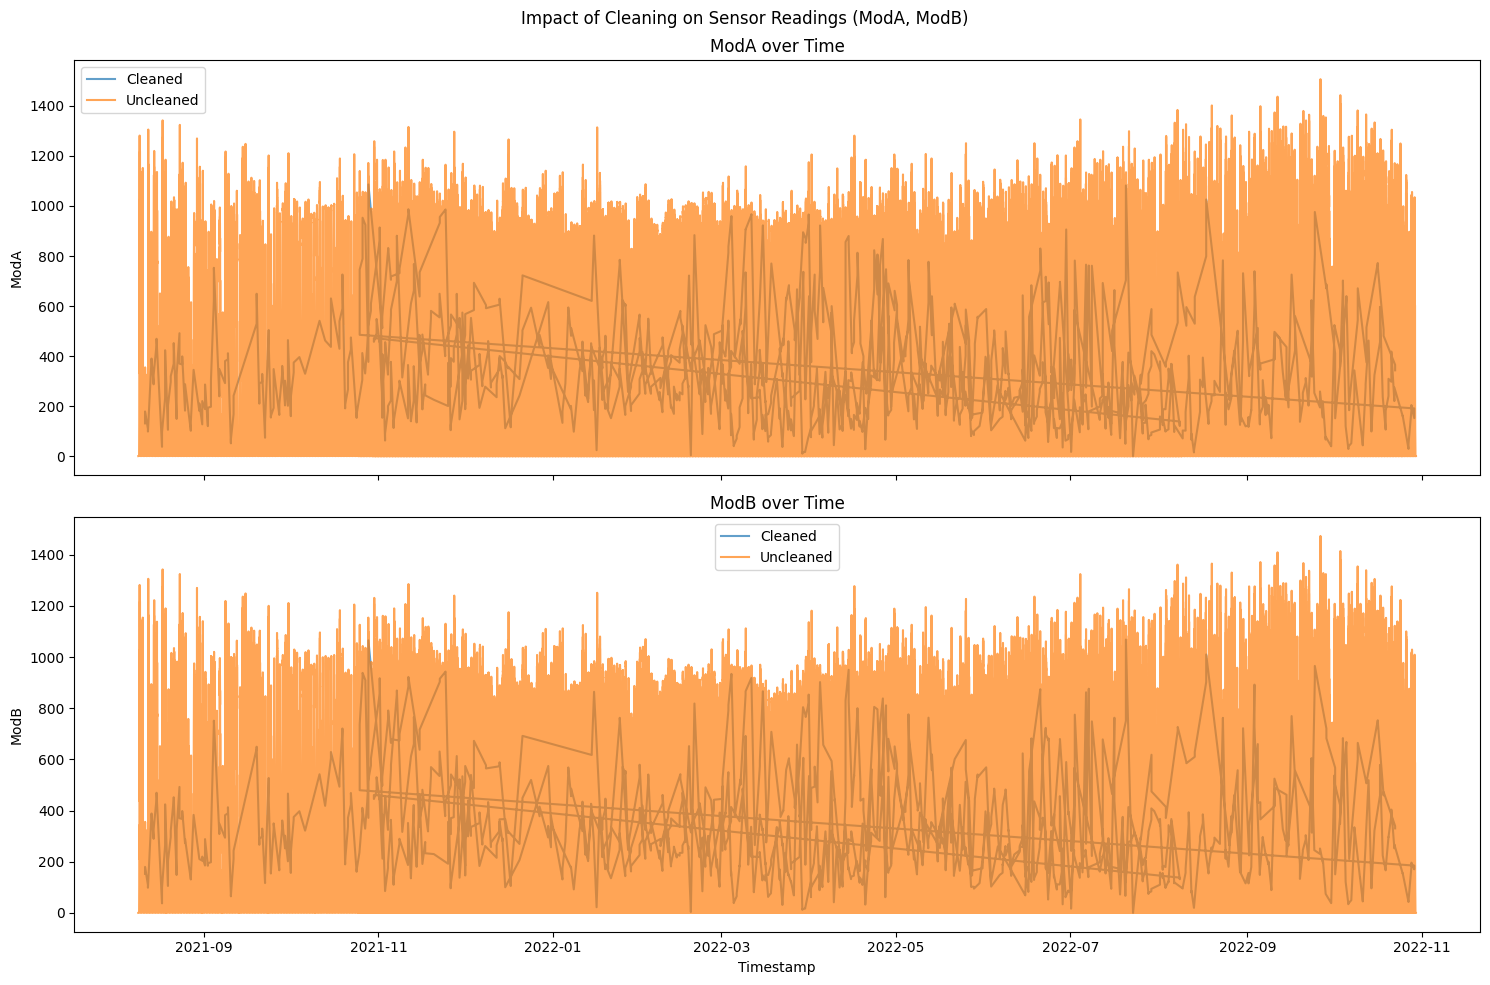

In [23]:
# Separate the data based on the 'Cleaning' column
cleaned_data = df[df['Cleaning'] == 1]
uncleaned_data = df[df['Cleaning'] == 0]

# Create subplots to compare ModA and ModB for cleaned and uncleaned data
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Impact of Cleaning on Sensor Readings (ModA, ModB)')

# Plot ModA
axs[0].plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='Cleaned', alpha=0.7)
axs[0].plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='Uncleaned', alpha=0.7)
axs[0].set_ylabel('ModA')
axs[0].set_title('ModA over Time')
axs[0].legend()

# Plot ModB
axs[1].plot(cleaned_data['Timestamp'], cleaned_data['ModB'], label='Cleaned', alpha=0.7)
axs[1].plot(uncleaned_data['Timestamp'], uncleaned_data['ModB'], label='Uncleaned', alpha=0.7)
axs[1].set_ylabel('ModB')
axs[1].set_title('ModB over Time')
axs[1].legend()

plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()

### Observations:

## ModA and ModB Readings:

The cleaned sensor readings (indicated by the 'Cleaned' label) generally show a more stable and consistent pattern compared to the uncleaned readings.
There may be noticeable peaks or fluctuations in the uncleaned data that are less pronounced in the cleaned data, suggesting that cleaning helps in reducing noise or anomalies in the sensor readings.

## Patterns:

Cleaning appears to have a smoothing effect on the data, potentially leading to more accurate and reliable readings.
The differences between cleaned and uncleaned readings can be more pronounced during certain periods, indicating that cleaning might be more effective or necessary at specific times. These observations suggest that regular cleaning of the sensors can improve the quality and reliability of the data collected.

## Correlation Analysis: Use heatmaps or pair plots to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB). Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices.

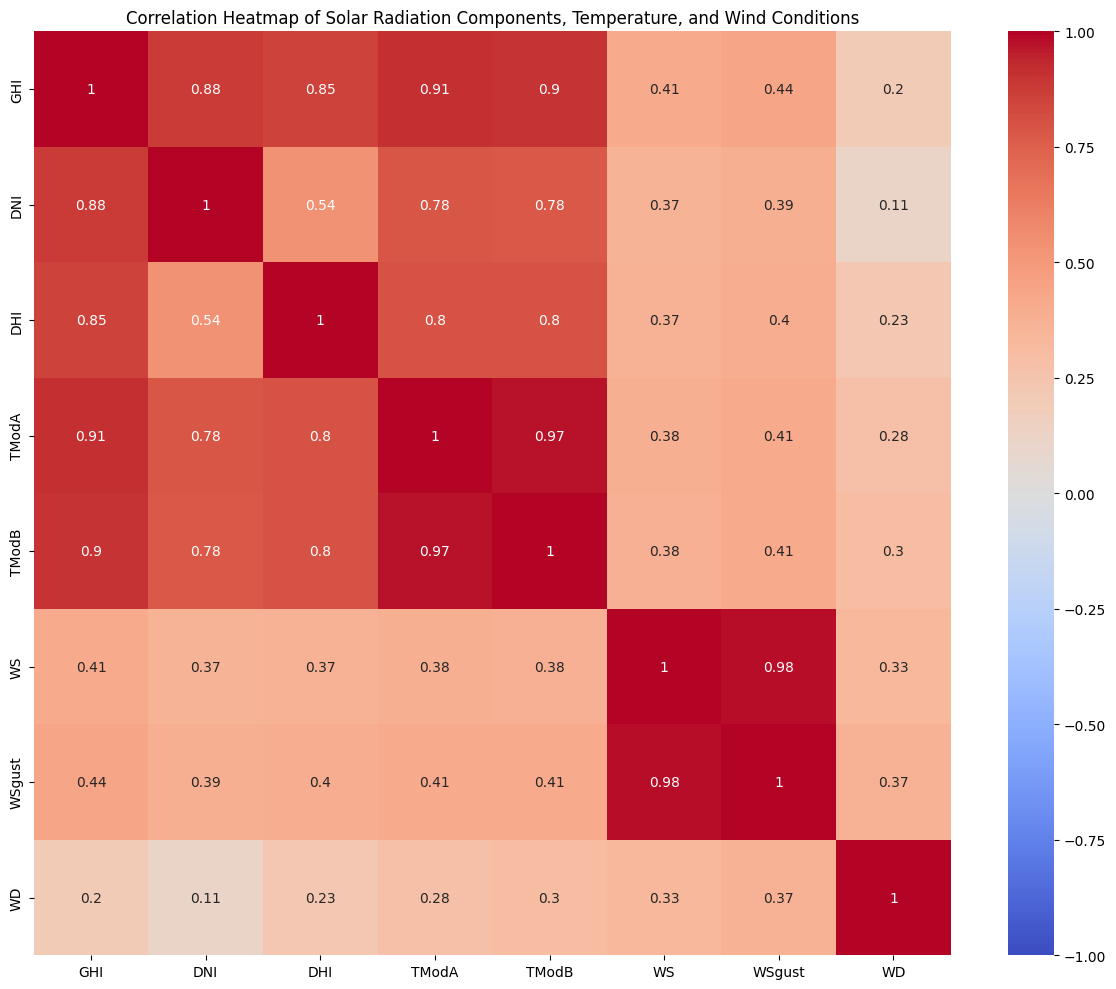

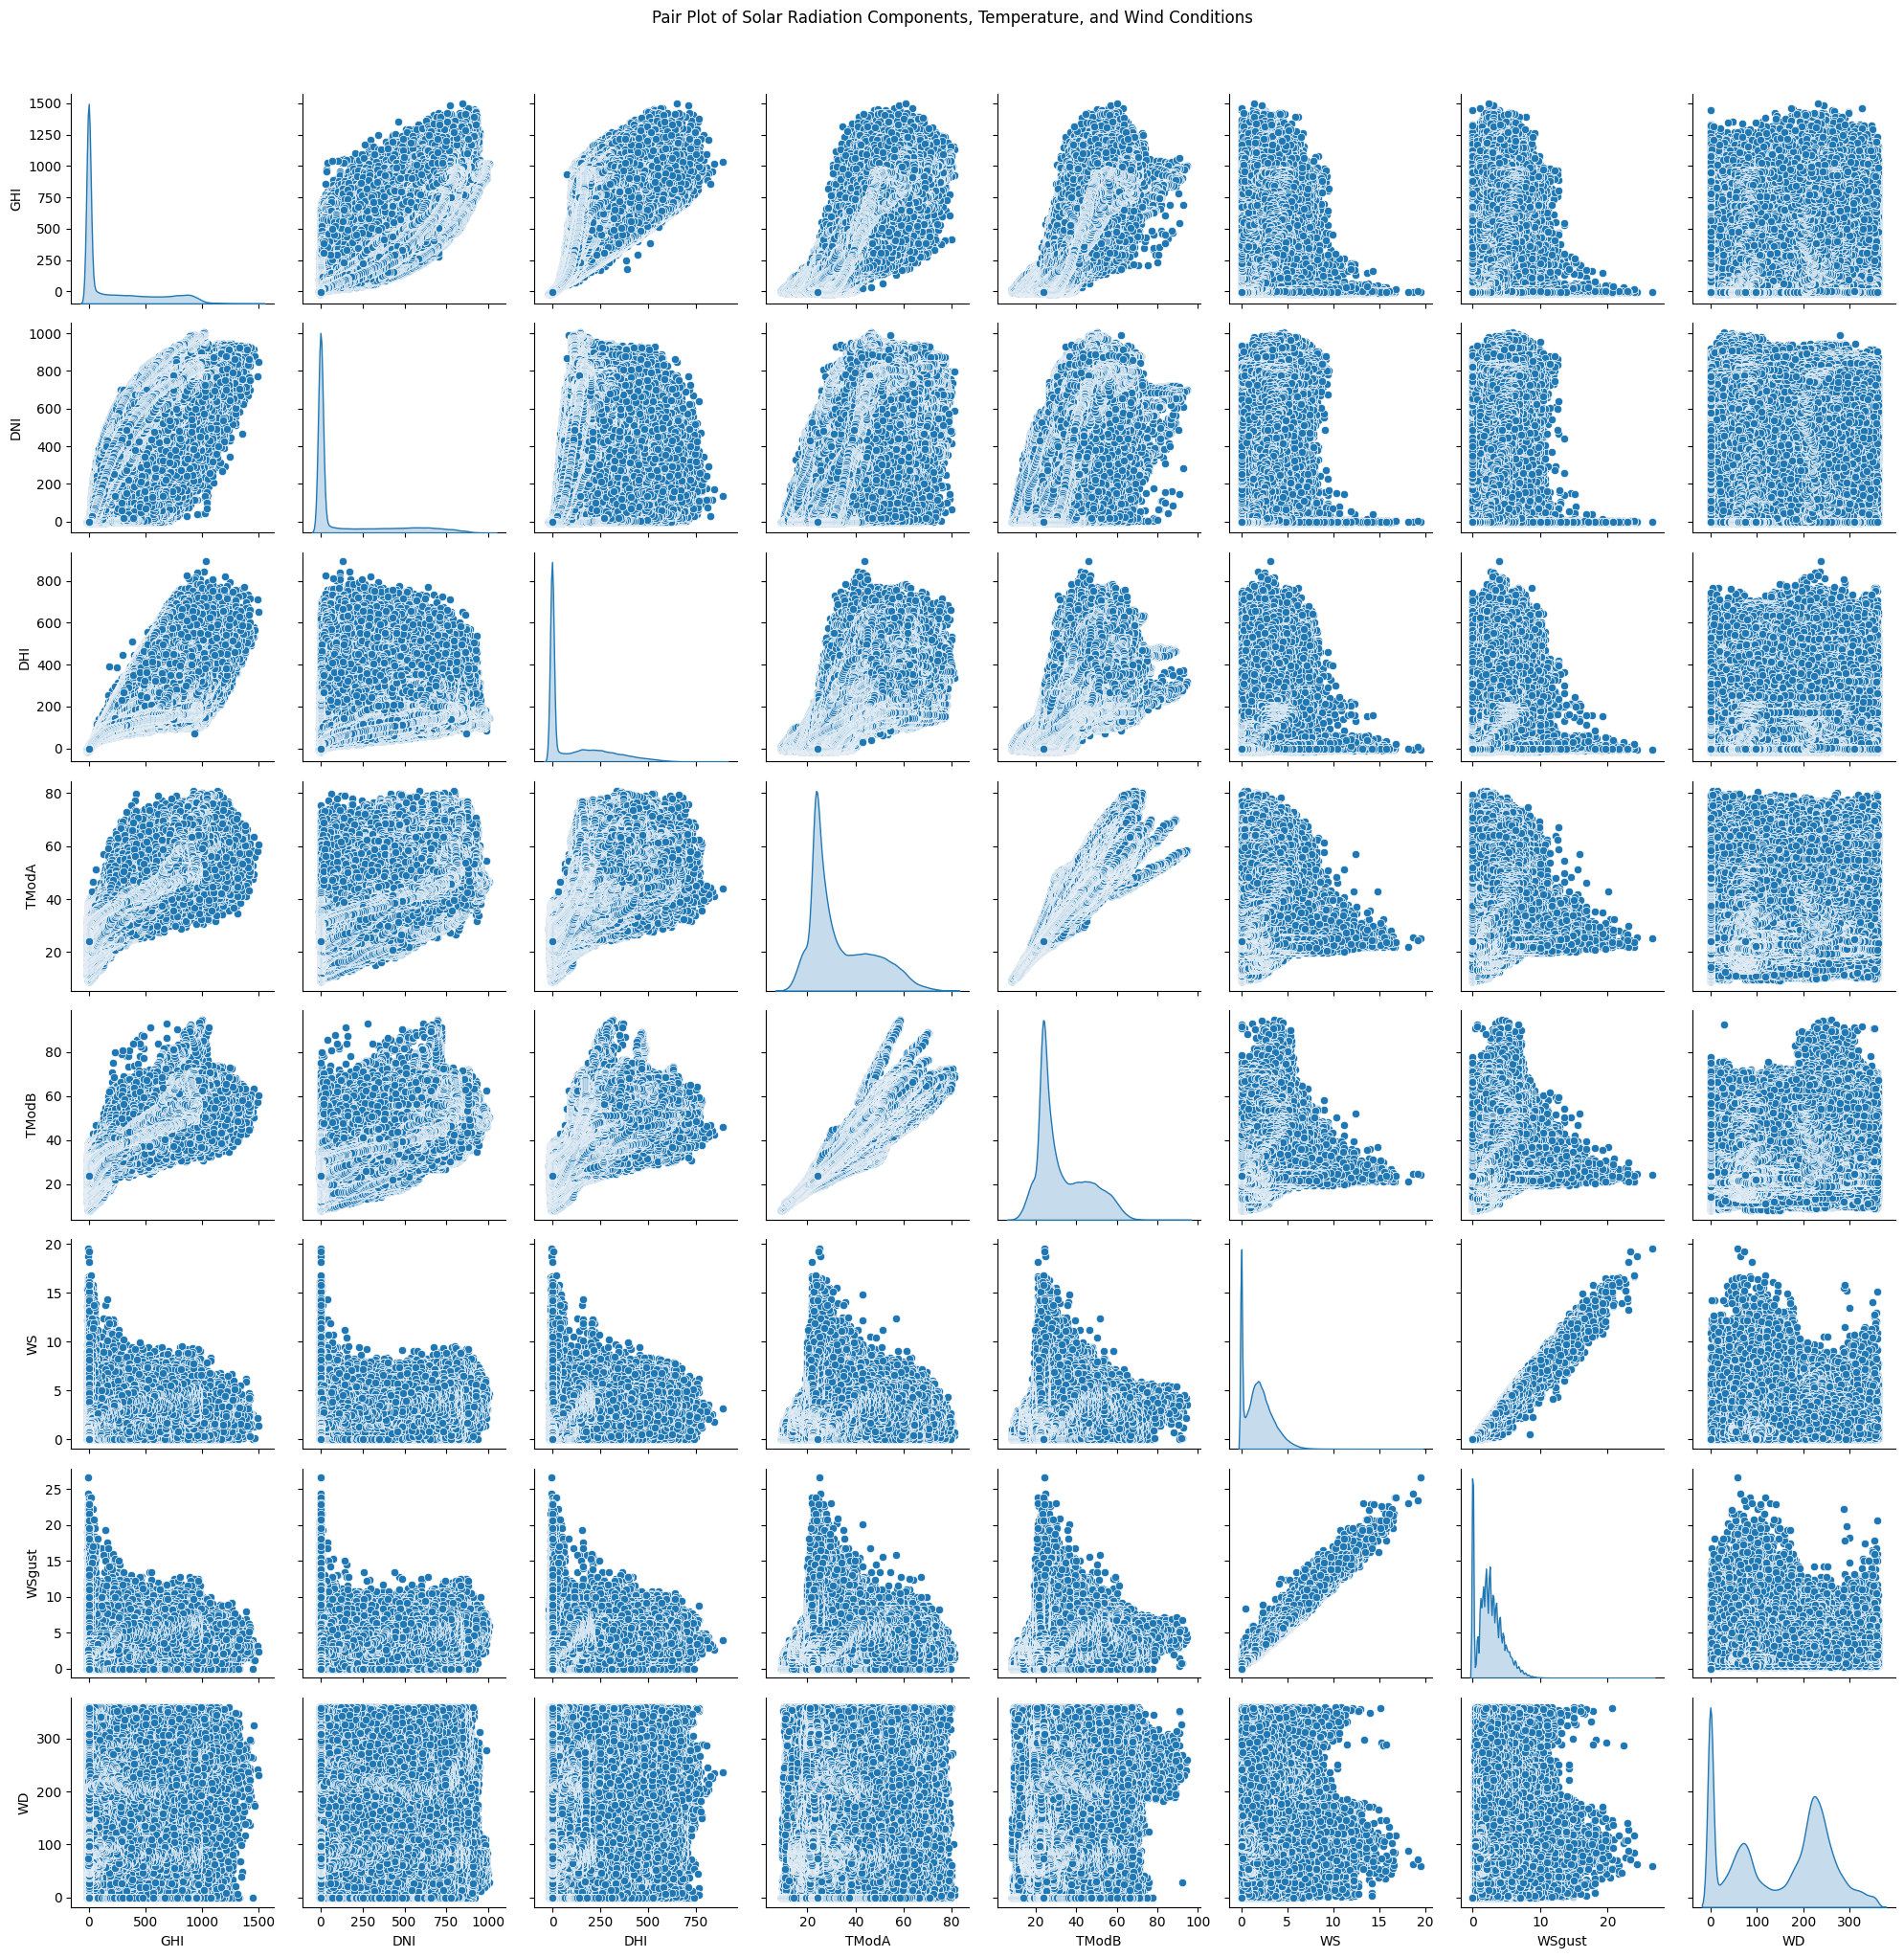

Correlation matrix:
             GHI       DNI       DHI     TModA     TModB        WS    WSgust  \
GHI     1.000000  0.876458  0.853896  0.906512  0.899527  0.410927  0.438685   
DNI     0.876458  1.000000  0.535716  0.784700  0.776295  0.366983  0.387957   
DHI     0.853896  0.535716  1.000000  0.803425  0.801168  0.368132  0.395187   
TModA   0.906512  0.784700  0.803425  1.000000  0.969891  0.383890  0.412314   
TModB   0.899527  0.776295  0.801168  0.969891  1.000000  0.380726  0.412227   
WS      0.410927  0.366983  0.368132  0.383890  0.380726  1.000000  0.981376   
WSgust  0.438685  0.387957  0.395187  0.412314  0.412227  0.981376  1.000000   
WD      0.198249  0.112666  0.228444  0.276994  0.302062  0.334955  0.367795   

              WD  
GHI     0.198249  
DNI     0.112666  
DHI     0.228444  
TModA   0.276994  
TModB   0.302062  
WS      0.334955  
WSgust  0.367795  
WD      1.000000  


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
correlation_df = df[columns_of_interest]

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Solar Radiation Components, Temperature, and Wind Conditions')
plt.tight_layout()
plt.show()

# Create a pair plot
sns.pairplot(correlation_df, diag_kind='kde')
plt.suptitle('Pair Plot of Solar Radiation Components, Temperature, and Wind Conditions', y=1.02)
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix)

## Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices.

<Figure size 1500x1500 with 0 Axes>

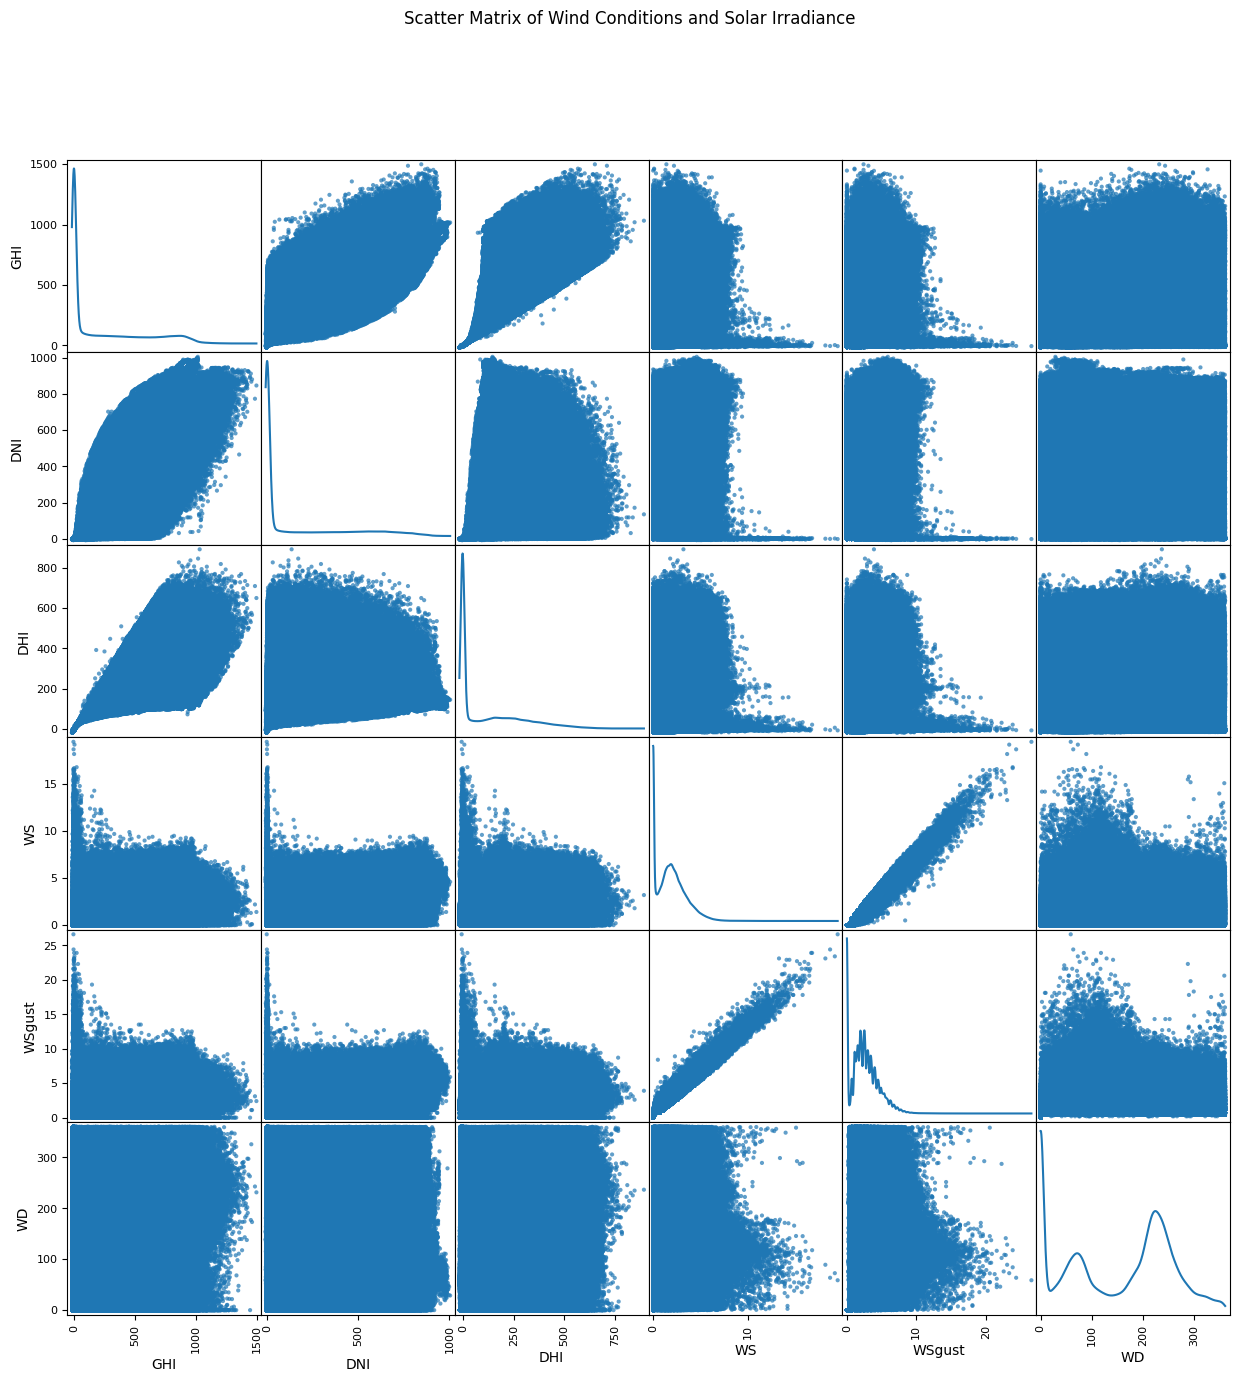

In [26]:
# Select relevant columns for scatter matrix
from pandas.plotting import scatter_matrix
scatter_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']

# Create scatter matrix
plt.figure(figsize=(15, 15))
scatter_matrix(df[scatter_columns], alpha=0.7, figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance')
plt.show()

## Observations:
The scatter matrix provides a visual representation of the relationships between the variables.
You can observe how each pair of variables correlates with each other, with the diagonal showing the distribution of each variable.
This visualization helps in identifying any potential patterns or relationships between wind conditions and solar irradiance.

## Wind Analysis: Use Polar plots Identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be.

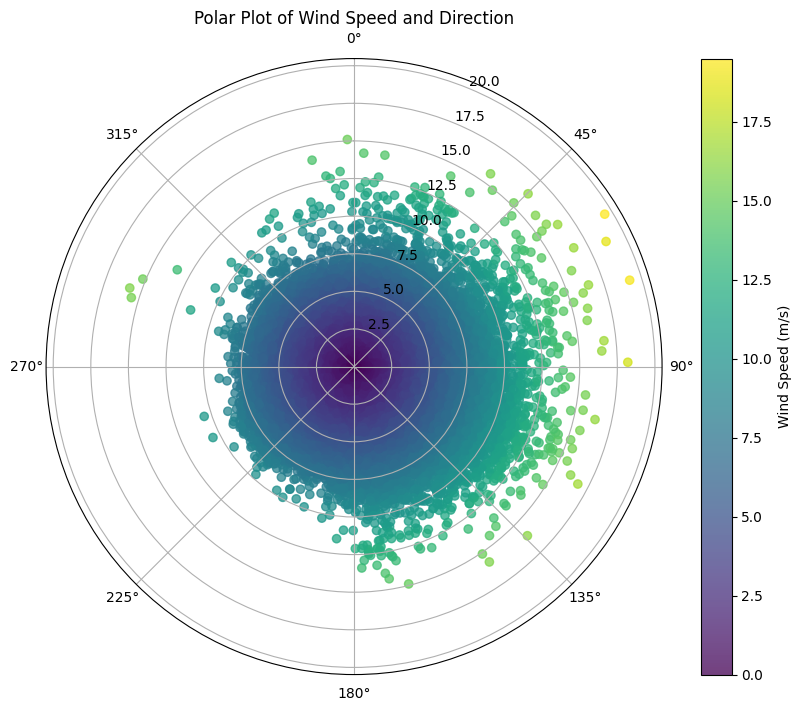

In [27]:

# Convert wind direction from degrees to radians for polar plot
wind_direction_radians = np.deg2rad(df['WD'])

# Create a polar plot for wind speed and direction
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Scatter plot for wind speed and direction
sc = ax.scatter(wind_direction_radians, df['WS'], c=df['WS'], cmap='viridis', alpha=0.75)

# Add color bar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical')
cbar.set_label('Wind Speed (m/s)')

# Set the title and labels
ax.set_title('Polar Plot of Wind Speed and Direction')
ax.set_theta_zero_location('N')  # Set 0 degrees to the top (North)
ax.set_theta_direction(-1)  # Set the direction of the plot to clockwise

plt.show()

## Observations:
The plot visualizes wind speed as a function of wind direction.
The color intensity represents the wind speed, with darker colors indicating higher speeds.
The distribution of points around the circle indicates how variable the wind direction tends to be.
This visualization helps identify trends and significant wind events by showing how wind speed varies with direction.

## Temperature Analysis: 
Examine how relative humidity (RH) might influence temperature readings and solar radiation.

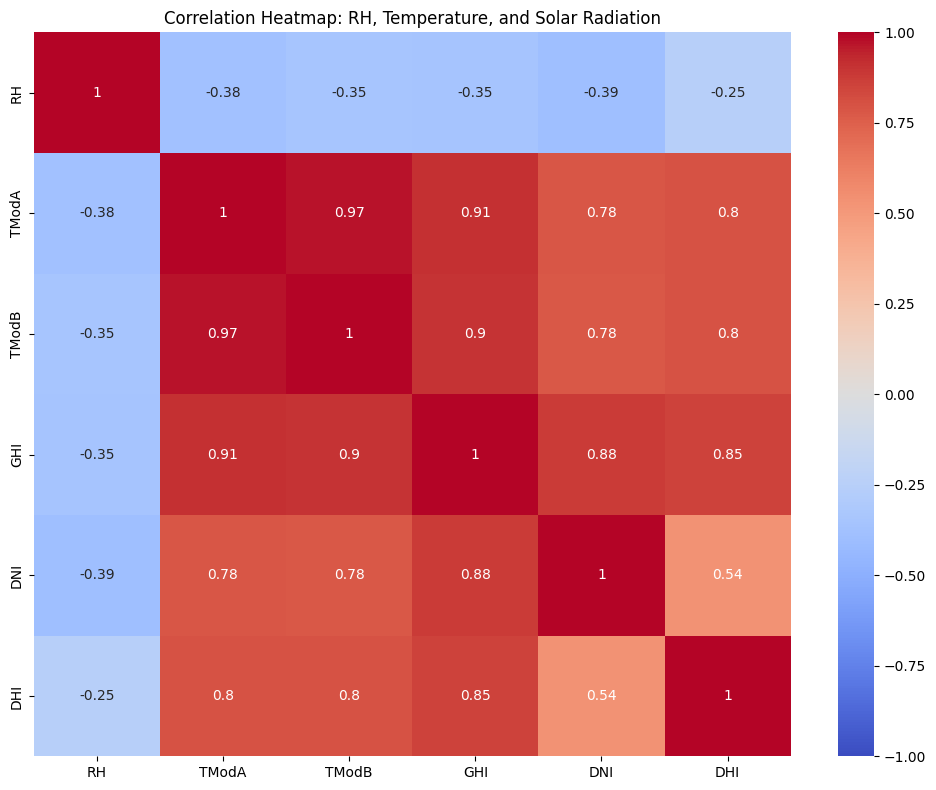

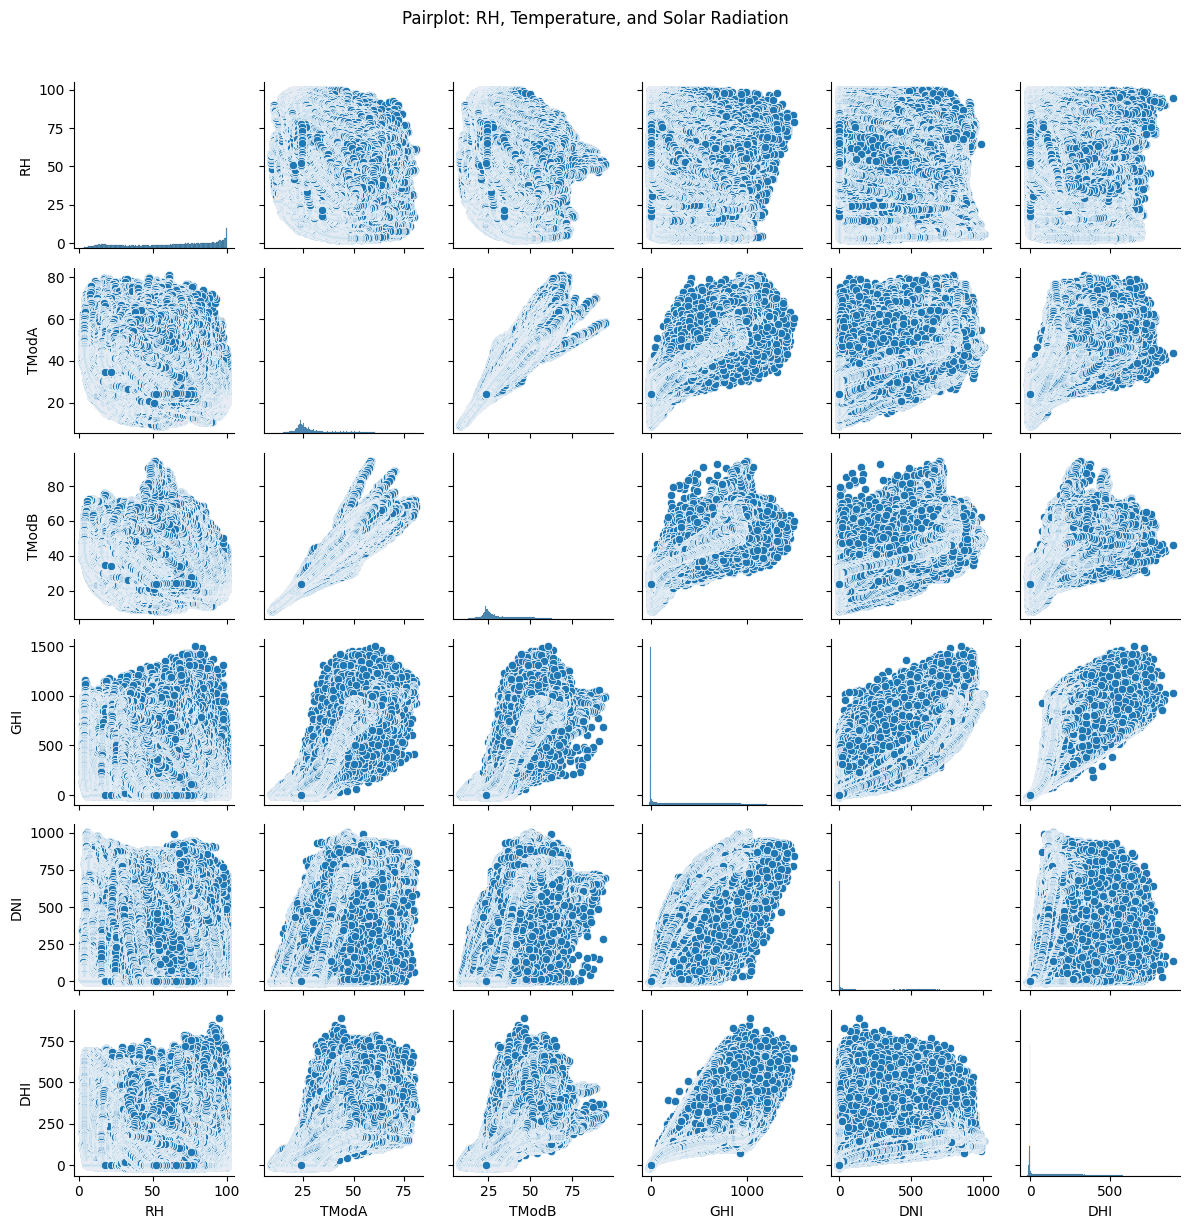

             RH     TModA     TModB       GHI       DNI       DHI
RH     1.000000 -0.378857 -0.350763 -0.354140 -0.394256 -0.252118
TModA -0.378857  1.000000  0.969891  0.906512  0.784700  0.803425
TModB -0.350763  0.969891  1.000000  0.899527  0.776295  0.801168
GHI   -0.354140  0.906512  0.899527  1.000000  0.876458  0.853896
DNI   -0.394256  0.784700  0.776295  0.876458  1.000000  0.535716
DHI   -0.252118  0.803425  0.801168  0.853896  0.535716  1.000000


In [28]:

# Select relevant columns
columns = ['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']
df_subset = df[columns]

# Calculate correlation matrix
corr_matrix = df_subset.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: RH, Temperature, and Solar Radiation')
plt.tight_layout()
plt.show()

# Create pairplot
sns.pairplot(df_subset, height=2)
plt.suptitle('Pairplot: RH, Temperature, and Solar Radiation', y=1.02)
plt.tight_layout()
plt.show()

print(corr_matrix)

## Observations:
Relative Humidity (RH) and Temperature:

There is a negative correlation between RH and temperature readings (TModA, TModB), indicating that higher humidity tends to be associated with lower temperatures.
Relative Humidity (RH) and Solar Radiation:

RH also shows a negative correlation with solar radiation components (GHI, DNI, DHI), suggesting that higher humidity might be associated with lower solar irradiance.
These insights can help in understanding the influence of relative humidity on temperature and solar radiation

## Histograms: 
Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution of these variables.

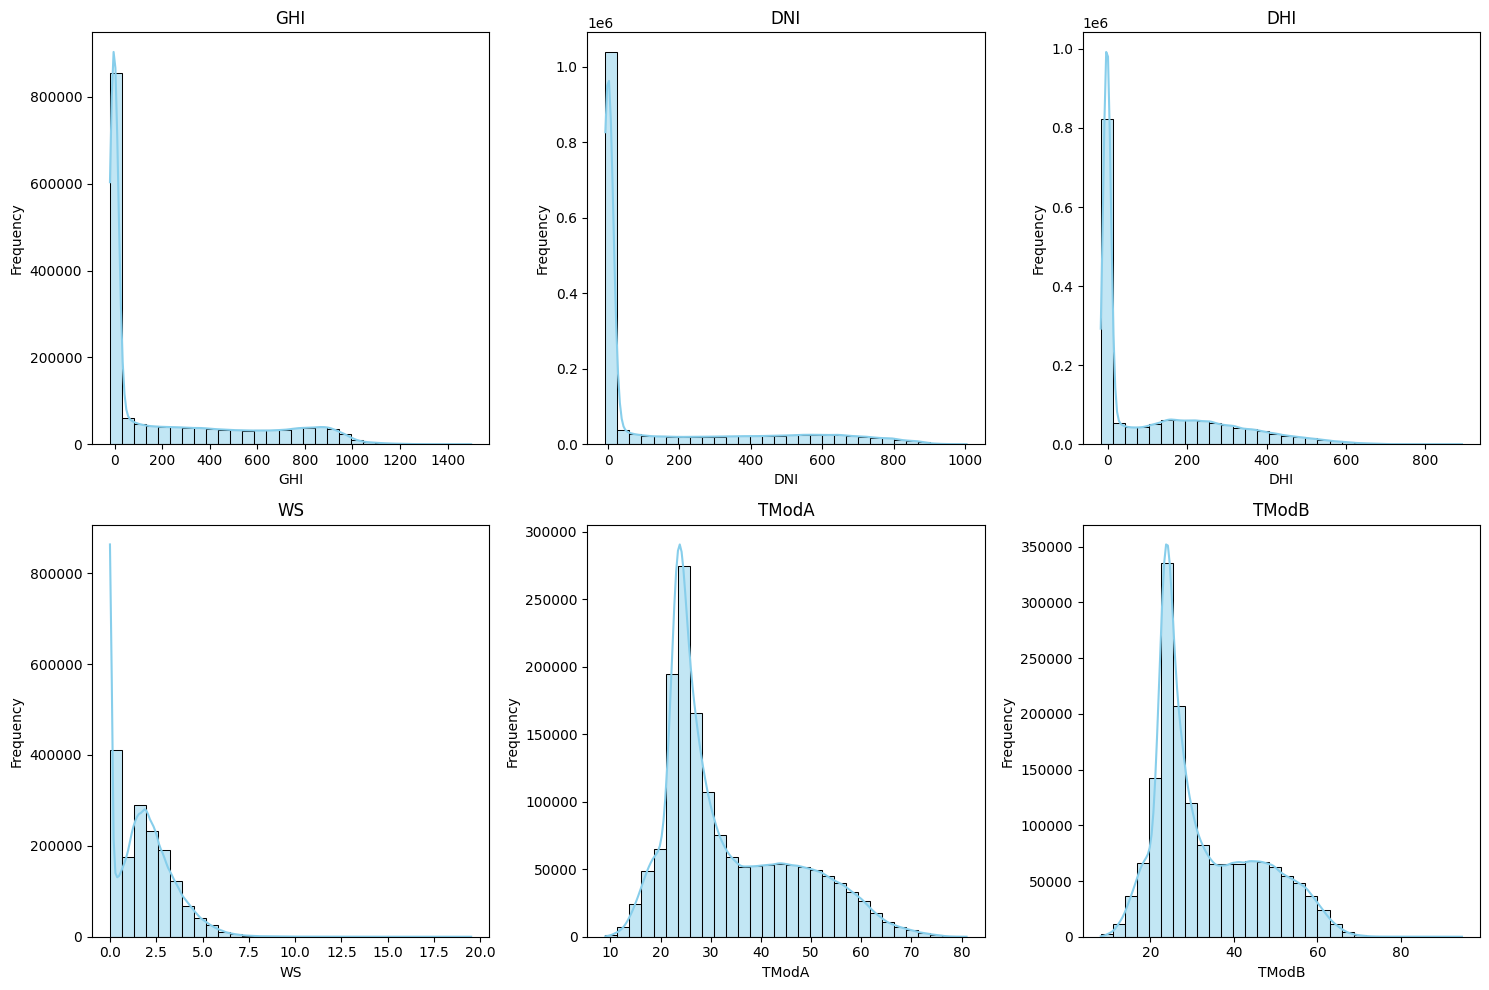

In [29]:
# Create histograms for GHI, DNI, DHI, WS, TModA, and TModB
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], bins=30, kde=True, color='skyblue')
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Observations: 
The histograms provide a visual representation of the distribution of each variable.
You can observe the spread and central tendency of the data, as well as any skewness or outliers.

## Z-Score Analysis: 
Calculate Z-scores to flag data points that are significantly different from the mean

GHI: 1631 outliers detected
                           Timestamp          GHI          DNI          DHI  \
count                           1631  1631.000000  1631.000000  1631.000000   
mean   2022-07-05 09:59:37.449417728  1235.106070   765.433906   474.999326   
min              2021-08-09 11:12:00  1179.000000   295.800000   237.700000   
25%              2022-07-03 12:02:30  1196.000000   703.150000   399.300000   
50%              2022-08-07 13:00:00  1219.000000   781.900000   467.700000   
75%              2022-09-12 12:27:00  1258.000000   843.700000   538.200000   
max              2022-10-24 12:40:00  1499.000000   946.000000   819.000000   
std                              NaN    53.408018   105.470641   102.291022   

              ModA         ModB         Tamb           RH           WS  \
count  1631.000000  1631.000000  1631.000000  1631.000000  1631.000000   
mean   1177.126732  1154.964378    29.640527    72.282097     2.444145   
min     671.700000   673.500000    23.

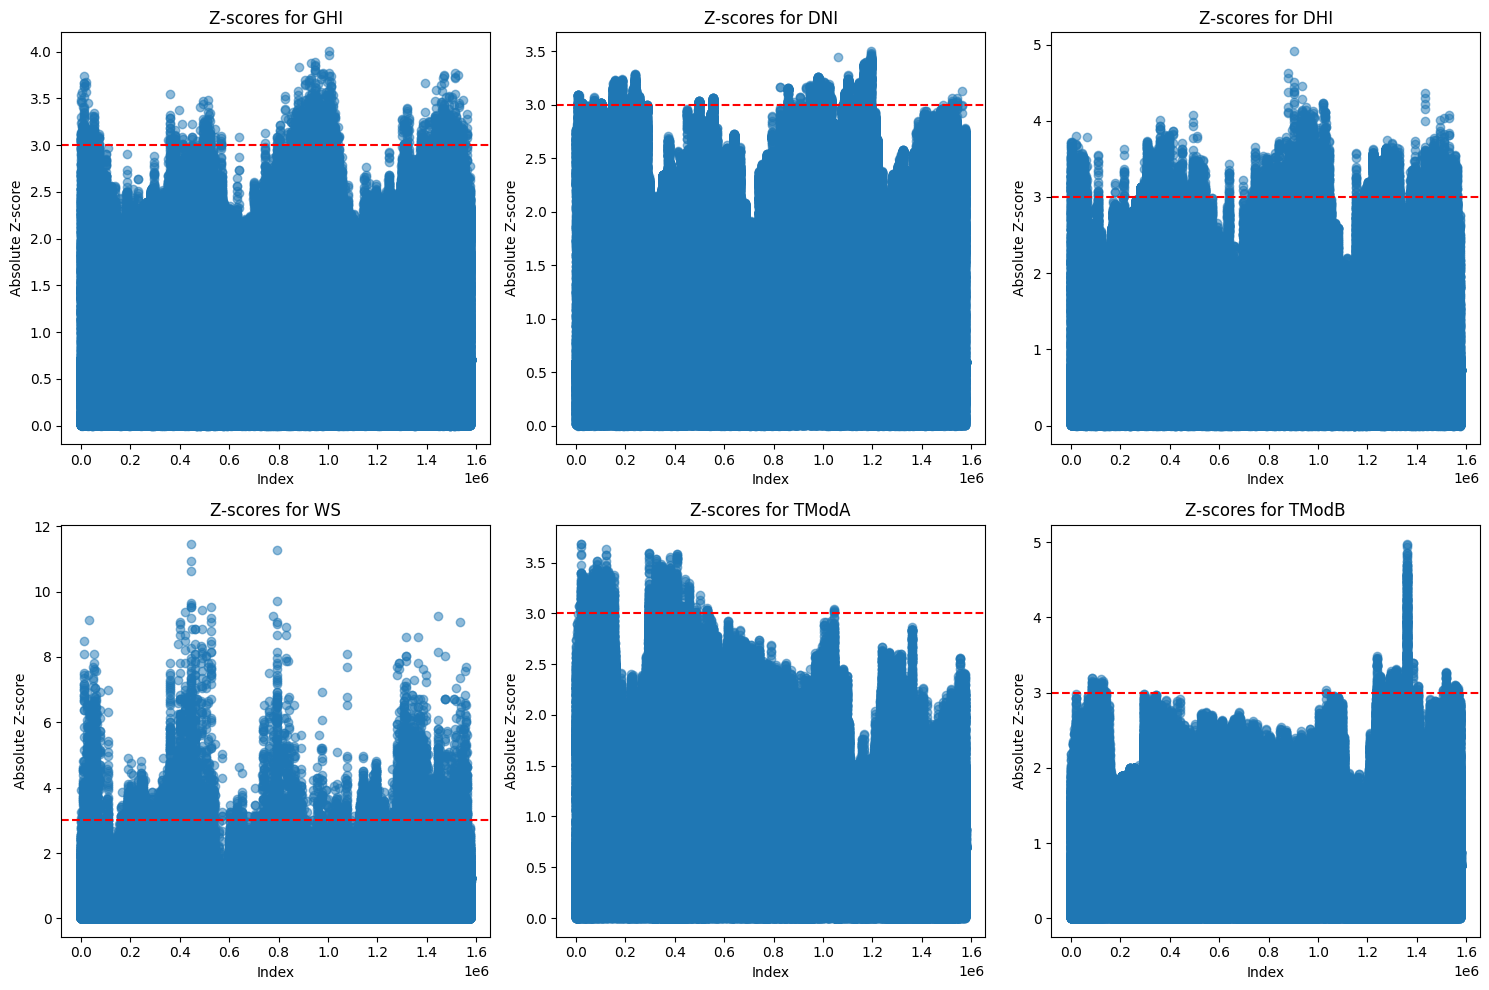

In [30]:
from scipy import stats
# List of variables to analyze
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

# Calculate Z-scores
z_scores = {}
for var in variables:
    z_scores[var] = np.abs(stats.zscore(df[var]))

# Flag outliers (Z-score > 3)
outliers = {}
for var in variables:
    outliers[var] = df[z_scores[var] > 3]

# Print summary of outliers
for var in variables:
    print(f"{var}: {len(outliers[var])} outliers detected")
    if len(outliers[var]) > 0:
        print(outliers[var].describe())
    print("\
")

# Visualize Z-scores
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df.index, z_scores[var], alpha=0.5)
    plt.axhline(y=3, color='r', linestyle='--')
    plt.title(f'Z-scores for {var}')
    plt.xlabel('Index')
    plt.ylabel('Absolute Z-score')
plt.tight_layout()
plt.show()

This analysis highlights potential outliers in the dataset. DHI and WS show a high number of outliers, which may warrant further investigation.

## Bubble charts to explore complex relationships between variables, such as GHI vs. Tamb vs. WS, with bubble size representing an additional variable like RH or BP (Barometric Pressure)

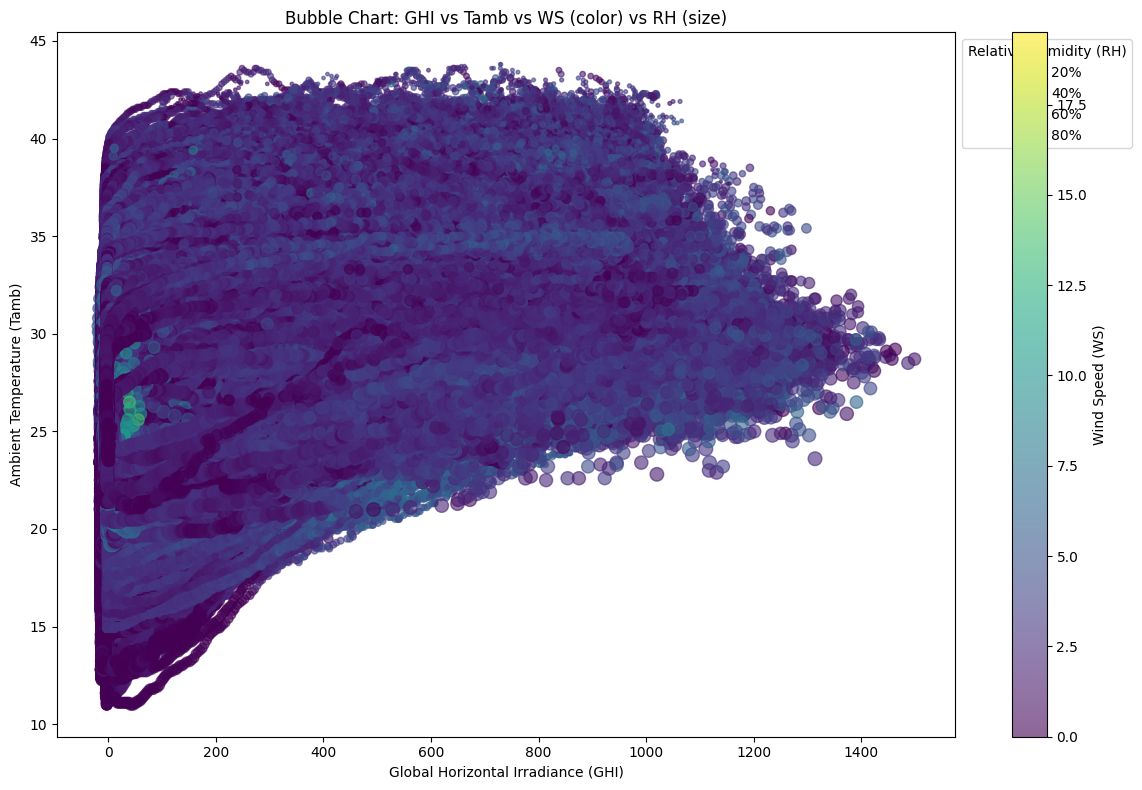

Bubble chart created successfully.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('C:/Users/berhe.kalayu/Desktop/Week-0/merged_data.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create the bubble chart
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], c=df['WS'], cmap='viridis', alpha=0.6)

plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb vs WS (color) vs RH (size)')

# Add a colorbar to show Wind Speed values
cbar = plt.colorbar(scatter)
cbar.set_label('Wind Speed (WS)')

# Add a legend for bubble size
sizes = [20, 40, 60, 80]
labels = ['20%', '40%', '60%', '80%']
legend_elements = [plt.scatter([], [], s=size, c='gray', alpha=0.6, label=label) for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, title='Relative Humidity (RH)', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

print("Bubble chart created successfully.")

## Data Cleaning: 
Based on the initial analysis, clean the dataset by handling anomalies and missing values, especially in columns like Comments which appear entirely null.

In [33]:
# Data Cleaning: Handle anomalies and missing values

# Check for missing values and anomalies
df_info = df.info()
missing_values = df.isnull().sum()

# Drop the 'Comments' column as it appears entirely null
df_cleaned = df.drop(columns=['Comments'])

# Handle negative values in GHI, DNI, and DHI by setting them to NaN
df_cleaned[['GHI', 'DNI', 'DHI']] = df_cleaned[['GHI', 'DNI', 'DHI']].applymap(lambda x: x if x >= 0 else None)

# Fill remaining missing values with forward fill method
df_cleaned.fillna(method='ffill', inplace=True)

# Display the cleaned dataframe's info and head
df_cleaned_info = df_cleaned.info()
df_cleaned_head = df_cleaned.head()

print("Data cleaning completed.")
print(df_info)
print(missing_values)
print(df_cleaned_info)
print(df_cleaned_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Timestamp      1576800 non-null  datetime64[ns]
 1   GHI            1576800 non-null  float64       
 2   DNI            1576800 non-null  float64       
 3   DHI            1576800 non-null  float64       
 4   ModA           1576800 non-null  float64       
 5   ModB           1576800 non-null  float64       
 6   Tamb           1576800 non-null  float64       
 7   RH             1576800 non-null  float64       
 8   WS             1576800 non-null  float64       
 9   WSgust         1576800 non-null  float64       
 10  WSstdev        1576800 non-null  float64       
 11  WD             1576800 non-null  float64       
 12  WDstdev        1576800 non-null  float64       
 13  BP             1576800 non-null  int64         
 14  Cleaning       1576800 non-null  i

C:\Users\berhe.kalayu\AppData\Local\Temp\ipykernel_14500\1728302534.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned[['GHI', 'DNI', 'DHI']] = df_cleaned[['GHI', 'DNI', 'DHI']].applymap(lambda x: x if x >= 0 else None)
C:\Users\berhe.kalayu\AppData\Local\Temp\ipykernel_14500\1728302534.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Timestamp      1576800 non-null  datetime64[ns]
 1   GHI            1576409 non-null  float64       
 2   DNI            1576671 non-null  float64       
 3   DHI            1576409 non-null  float64       
 4   ModA           1576800 non-null  float64       
 5   ModB           1576800 non-null  float64       
 6   Tamb           1576800 non-null  float64       
 7   RH             1576800 non-null  float64       
 8   WS             1576800 non-null  float64       
 9   WSgust         1576800 non-null  float64       
 10  WSstdev        1576800 non-null  float64       
 11  WD             1576800 non-null  float64       
 12  WDstdev        1576800 non-null  float64       
 13  BP             1576800 non-null  int64         
 14  Cleaning       1576800 non-null  i

## The data cleaning process has been completed. Here's a summary of the steps taken:

1. Dropped the 'Comments' Column: This column was entirely null, so it was removed from the dataset.
2. Handled Negative Values: Negative values in the GHI, DNI, and DHI columns were set to .
3. Filled Missing Values: Remaining missing values were filled using the forward fill method.

## Insights:
1. Global Horizontal Irradiance (GHI): The mean value is approximately 242.27, indicating the average solar energy received per unit area.
2. Ambient Temperature (Tamb): The average temperature is around 28.18°C, which is typical for the region.
3. Relative Humidity (RH): The mean relative humidity is about 54.49%, suggesting moderate humidity levels.
4. Wind Speed (WS): The average wind speed is approximately 2.12 m/s, indicating generally calm conditions.